In [24]:
import numpy as np
from numpy import random
import scipy as sp

import anndata as ad
from scanpy.api.tl import diffmap
from scanpy.api.tl import umap
from scanpy.api.tl import tsne
from scanpy.api import pp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import tree
import simulation as sim
import sim_utils as sut
import count_model as cmod

In [25]:
import matplotlib as mpl
import matplotlib.cm as cmod

In [5]:
rseed = 42
np.random.seed(rseed)

In [42]:
num_brpoints = 5
top = tree.Tree.gen_random_topology(num_brpoints)

branches = np.unique(np.array(top).flatten())
num_branches = 2 * num_brpoints + 1
time = {b: 50 for b in branches}
modules = 5 * num_brpoints + np.random.randint(3, 20)
G = 500

In [43]:
t = tree.Tree(topology=top, time=time, num_branches=num_branches,
              G=G, branch_points=num_brpoints, modules=modules)

In [44]:
mya = np.min([0.05, 1 / t.modules])

In [79]:
eta = sp.stats.uniform.rvs()

In [113]:
uMs, Ws, Hs = sim.simulate_lineage(t, a=mya, intra_branch_tol=-1, inter_branch_tol=0)

/home/npapado/miniconda3/envs/py36/lib/python3.6/site-packages/scipy/stats/stats.py:3010: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den


In [114]:
gene_scale = sut.simulate_base_gene_exp(t, uMs)
t.add_genes(uMs, gene_scale)

In [115]:
M = {}
for i in t.branches:
    M[i] = np.exp(uMs[i]) * gene_scale

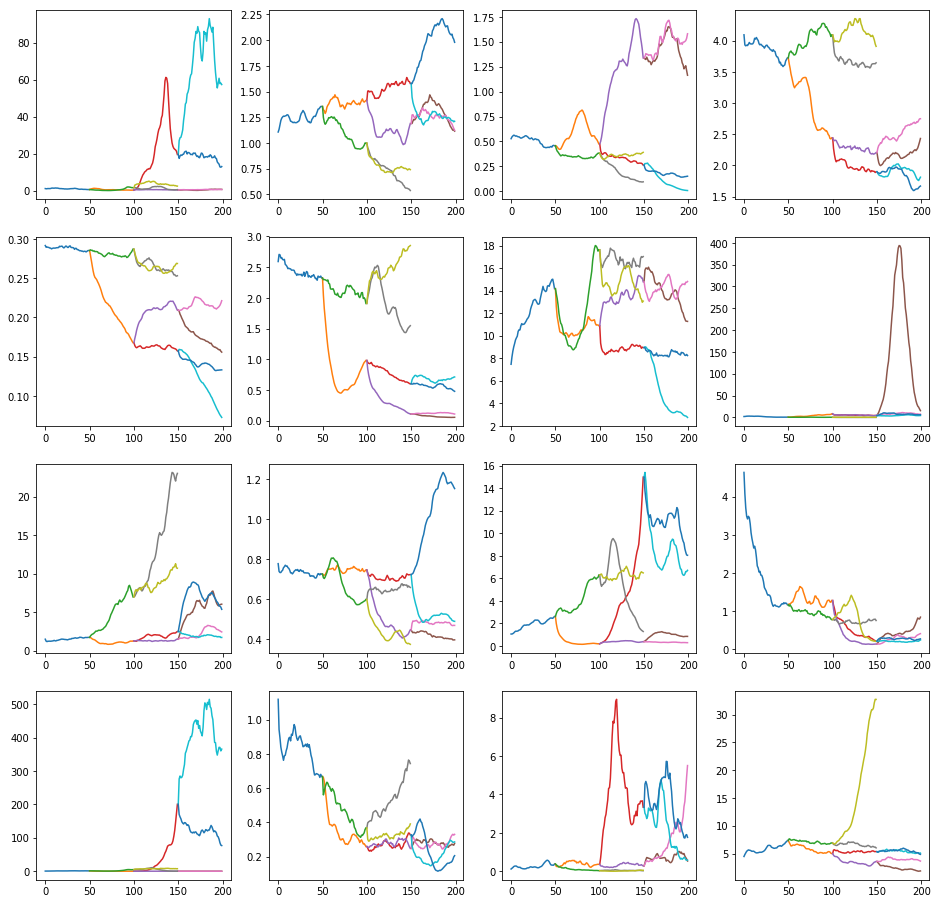

In [123]:
genes = np.random.randint(0, high=G, size=16)
pt, br = sim.cover_whole_tree(t)
pt = np.array(pt)
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 16))
for i in range(4):
    for j in range(4):
        g = i*4 + j
        for b in t.branches:
            x = pt[br == b]
            ax[i][j].plot(x, M[b][:, g])

In [124]:
alpha1 = np.exp(random.normal(loc=np.log(0.2), scale=np.log(1.5), size=t.G))
beta1 = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=t.G)) + 1

In [125]:
X1, labs1, brns1, scalings1 = sim.sample_whole_tree(t, 2, alpha=alpha1, beta=beta1)

# normalize gene expression by library size
X1 = (X1.transpose() / scalings1).transpose()

In [126]:
X1.shape

(1100, 500)

In [127]:
data1 = ad.AnnData(np.log(X1+1))
pp.neighbors(data1, use_rep='X', n_neighbors=int(X1.shape[0] / 2))
umap(data1)
dm1 = data1.obsm["X_umap"]
br_names1, indices1 = np.unique(brns1, return_inverse=True)

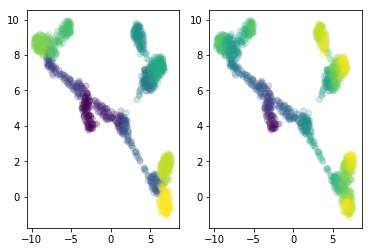

In [130]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(dm1[:, 0], dm1[:, 1], c=(indices1), alpha=0.2)
ax[1].scatter(dm1[:, 0], dm1[:, 1], c=labs1, alpha=0.2)

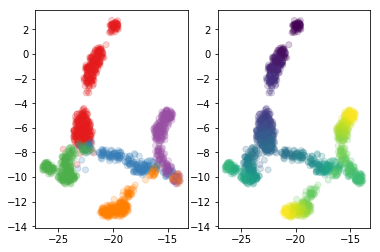

In [39]:
spaced_sample_times = np.arange(0, t.get_max_time(), 5)
spaced_times = np.repeat(spaced_sample_times, 50)

X2, labs2, brns2, scalings2 = sim._sample_data_at_times(t, spaced_times, alpha=alpha1, beta=beta1)

# normalize gene expression by library size
X2 = (X2.transpose() / scalings2).transpose()

data2 = ad.AnnData(np.log(X2+1))
pp.neighbors(data2, use_rep='X', n_neighbors=700)
umap(data2)
dm2 = data2.obsm["X_umap"]
br_names2, indices2 = np.unique(brns2, return_inverse=True)

fig, ax = plt.subplots(ncols=2)
# fig.set_size_inches(w=12, h=12)
ax[0].scatter(dm2[:, 0], dm2[:, 1], c=cm.Set1(indices2), alpha=0.2)
ax[1].scatter(dm2[:, 0], dm2[:, 1], c=labs2, alpha=0.2)

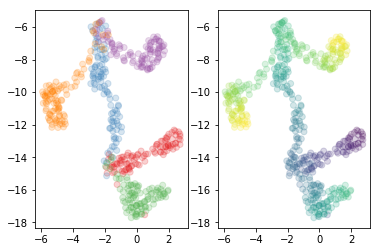

In [41]:
alpha3 = np.exp(random.normal(loc=np.log(0.0001), scale=np.log(1), size=t.G))
beta3 = np.exp(random.normal(loc=np.log(1), scale=np.log(1.5), size=t.G)) + 1

X3, labs3, brns3, scalings3 = sim.sample_whole_tree(t, 2, alpha=alpha3, beta=beta3)

# normalize gene expression by library size
X3 = (X3.transpose() / scalings3).transpose()

data3 = ad.AnnData(np.log(X3+1))
pp.neighbors(data3, use_rep='X', n_neighbors=250)
umap(data3)
dm3 = data3.obsm["X_umap"]
br_names3, indices3 = np.unique(brns3, return_inverse=True)

fig, ax = plt.subplots(ncols=2)
# fig.set_size_inches(w=12, h=12)
ax[0].scatter(dm3[:, 0], dm3[:, 1], c=cm.Set1(indices3), alpha=0.2)
ax[1].scatter(dm3[:, 0], dm3[:, 1], c=labs3, alpha=0.2)